**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, pairwise_distances

from scipy import stats
from scipy.spatial import distance

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):

    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X)

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.brute(X)
        return self.kdtree(X)

    def brute(self, X):
        distances = pairwise_distances(X, self.X, self.metric)
        result = self.y[np.argsort(distances)][:, :self.n_neighbors]
        return stats.mode(result, axis=1)[0].reshape(X.shape[0])

    def kdtree(self, X):
        _, indices = self.tree.query(X, k=self.n_neighbors)
        result = self.y[indices]
        return stats.mode(result, axis=1)[0].reshape(X.shape[0])


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 3.96 ms, total: 3.96 ms
Wall time: 2.98 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 12.2 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 7.05 ms, sys: 0 ns, total: 7.05 ms
Wall time: 5.35 ms


array([1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 4.33 ms, sys: 3.29 ms, total: 7.62 ms
Wall time: 5.96 ms


array([1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.54 ms, sys: 3.53 ms, total: 5.07 ms
Wall time: 4.7 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 398 µs, sys: 77 µs, total: 475 µs
Wall time: 454 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 3.58 ms, sys: 0 ns, total: 3.58 ms
Wall time: 4.37 ms


array([0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 3.19 ms, sys: 0 ns, total: 3.19 ms
Wall time: 4.13 ms


array([0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()

In [23]:
X = vectorizer.fit_transform(data)

In [24]:
X.shape

(11314, 101631)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [25]:
from sklearn.model_selection import KFold, cross_val_score

In [26]:
kf = KFold(n_splits=3)

In [27]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [28]:
scores = np.zeros(10)
for i in range(10):
    my_clf = MyKNeighborsClassifier(i+1, algorithm='brute')
    scores[i] = cross_val_score(my_clf, X, target, cv=3, n_jobs=-1, scoring='accuracy').mean()
scores

array([0.20850287, 0.18755499, 0.18463863, 0.18092665, 0.18340137,
       0.18295954, 0.18499239, 0.18649499, 0.18941176, 0.1913561 ])

In [29]:
scores

array([0.20850287, 0.18755499, 0.18463863, 0.18092665, 0.18340137,
       0.18295954, 0.18499239, 0.18649499, 0.18941176, 0.1913561 ])

In [30]:
plt.style.use('seaborn')

Text(0, 0.5, 'accuracy')

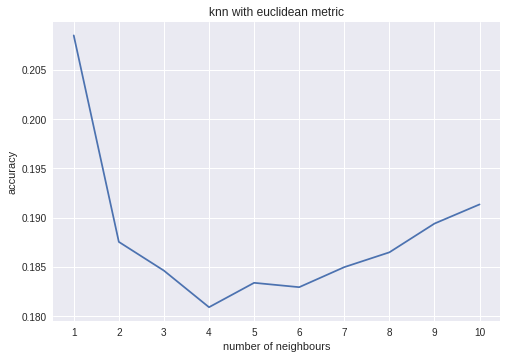

In [31]:
plt.title('knn with euclidean metric')
plt.xticks(np.arange(1,11,1))
plt.plot(np.arange(1,11,1), scores)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [32]:
scores_cosine = np.zeros(10)
for i in range(10):
    my_clf = MyKNeighborsClassifier(i+1, algorithm='brute', metric='cosine')
    scores_cosine[i] = cross_val_score(my_clf, X, target, cv=3, n_jobs=-1, scoring='accuracy').mean()
scores_cosine

array([0.29238086, 0.27205146, 0.26869292, 0.26542258, 0.2625947 ,
       0.25817547, 0.25799857, 0.25552389, 0.25296066, 0.24712739])

Text(0, 0.5, 'accuracy')

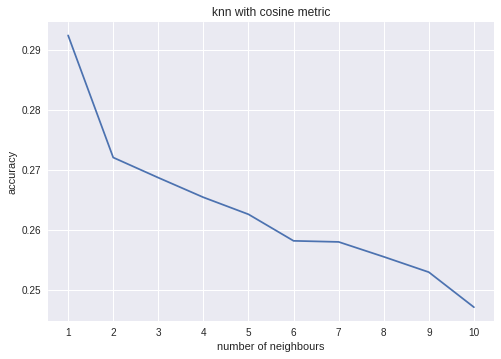

In [33]:
plt.title('knn with cosine metric')
plt.xticks(np.arange(1,11,1))
plt.plot(np.arange(1,11,1), scores_cosine)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tf_vectorizer = TfidfVectorizer()

X_tf = tf_vectorizer.fit_transform(data)

In [36]:
scores_tf = np.zeros(10)
for i in range(10):
    my_clf = MyKNeighborsClassifier(i+1, algorithm='brute', metric='cosine')
    scores_tf[i] = cross_val_score(my_clf, X_tf, target, cv=3, n_jobs=-1, scoring='accuracy').mean()
scores_tf

array([0.59589958, 0.55656597, 0.5654934 , 0.57088489, 0.57132723,
       0.56876379, 0.56902915, 0.56717312, 0.56761495, 0.56717335])

Text(0, 0.5, 'accuracy')

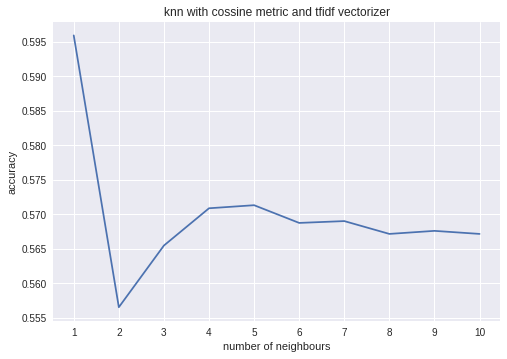

In [37]:
plt.title('knn with cossine metric and tfidf vectorizer')
plt.xticks(np.arange(1,11,1))
plt.plot(np.arange(1,11,1), scores_tf)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [38]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [39]:
data_test = newsgroups_test['data']
target_test = newsgroups_test['target']

In [40]:
X_test = tf_vectorizer.transform(data_test)

Выберем в качестве наилучшего алгоритма - алгоритм с числом соседей равным 5, так как при параметре равным 1 высок риск переобучения

In [42]:
my_clf = MyKNeighborsClassifier(5, algorithm='brute', metric='cosine')

In [43]:
my_clf.fit(X_tf, target)

In [44]:
y_pred = my_clf.predict(X_test)

In [45]:
accuracy_score(y_pred, target_test)

0.5030536378120021

На всякий случай, сравним с реализацией из sklearn

In [46]:
clf = KNeighborsClassifier(5, algorithm='brute', metric='cosine')
clf.fit(X_tf, target)
prediction = clf.predict(X_test)
accuracy_score(prediction, target_test)

0.5029208709506108

Качество упало на приблизительно 7% это может быть связано как с тем, что в тестовой выборке присутствуют новые слова, так и с тем, что алгоритм некоторым образом переобучился. К тому же мы используем валидацию на 3 фолдах, что также дает некоторую погрешность при оценке качества алгоритма